# R Exercises - part 3
- Name: Alberto Coppi
- Student ID: 2053063
- E-mail: <alberto.coppi@studenti.unipd.it>

## Import useful libraries

In [2]:
library(ggplot2)
library(gridExtra)
library(evaluate)

## Ex 1 - Triangular distribution

In [36]:
# triangular dist
dtriang <- function(x, a, b, c) sapply(x, function(x, a, b, c)
{
    return(
        ifelse(
            (x >= a) && (x <= b),
            ifelse( x < c, 
                (x-a)/(c-a), 
                (b-x)/(b-c)
            )*2/(b-a),
            0
        )
    )
}, a, b, c
)

### a)

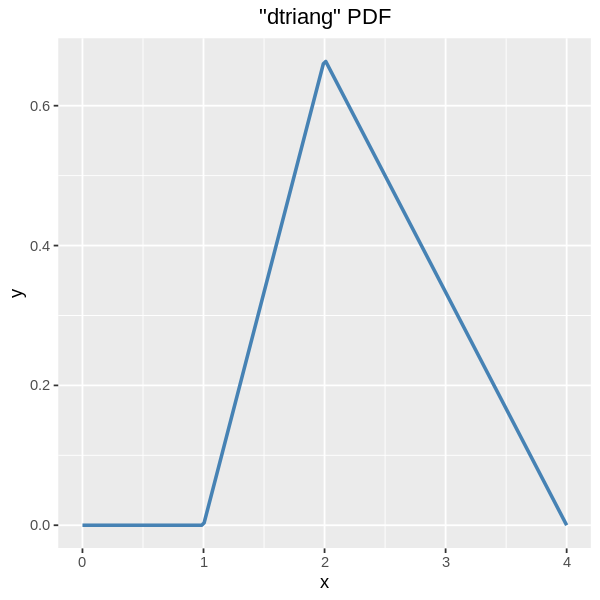

In [37]:
a <- 1
b <- 4
c <- 2

x <- seq(0, 4, length.out=200)
df <- data.frame(x=x, y=dtriang(x, a, b, c))

options(repr.plot.width=5, repr.plot.height=5)
p <- ggplot(df, aes(x=x, y=y)) +
     geom_line(color='steelblue', size=1) +
     labs(title='"dtriang" PDF') +
     theme(plot.title=element_text(hjust=0.5))
p

### b)

In [38]:
rtriang <- function(n, a, b, c) 
{
    M <- 2/(b-a)
    i <- 0
    result <- numeric()
    while( i < n)
    {
        u1 <- runif(1)
        u2 <- runif(1)
        x  <- a + (b-a)*u1
        if(u2*M < dtriang(x, a, b, c))
        {
            #cat('sono qui porcamadonna', x, i)
            result <- append(result, x)
            i <- i+1
        }
    }
    return(result) 
}

### c)

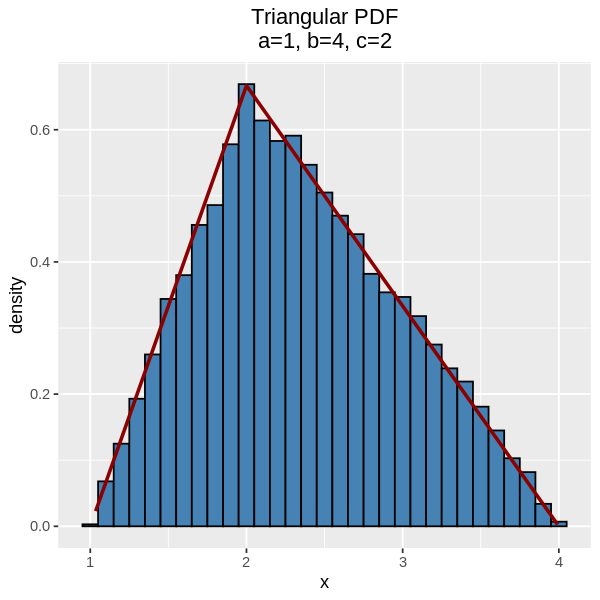

In [39]:

set.seed(1234)

x <- rtriang(10^4, a, b, c)
df <- data.frame(x, y=dtriang(x, a, b, c))

p <- ggplot(df, aes(x=x)) +
     geom_histogram(aes(y=after_stat(density)), fill='steelblue', color='black', binwidth=0.1) +
     labs(title=paste('Triangular PDF\na=', a, ', b=', b, ', c=', c, sep='')) +
     theme(plot.title=element_text(hjust=0.5)) +
     geom_line(aes(y=y), color='darkred', size=1)
p

## Ex 2 - Markov's inequality

In [40]:
G <- function(k, cumfunc, ...) {
    return(1-cumfunc(k, ...))
}

k <- seq(0, 10, length.out=101)
options(repr.plot.width=8, repr.plot.height=5)

### a) Exponential with $\lambda=1$

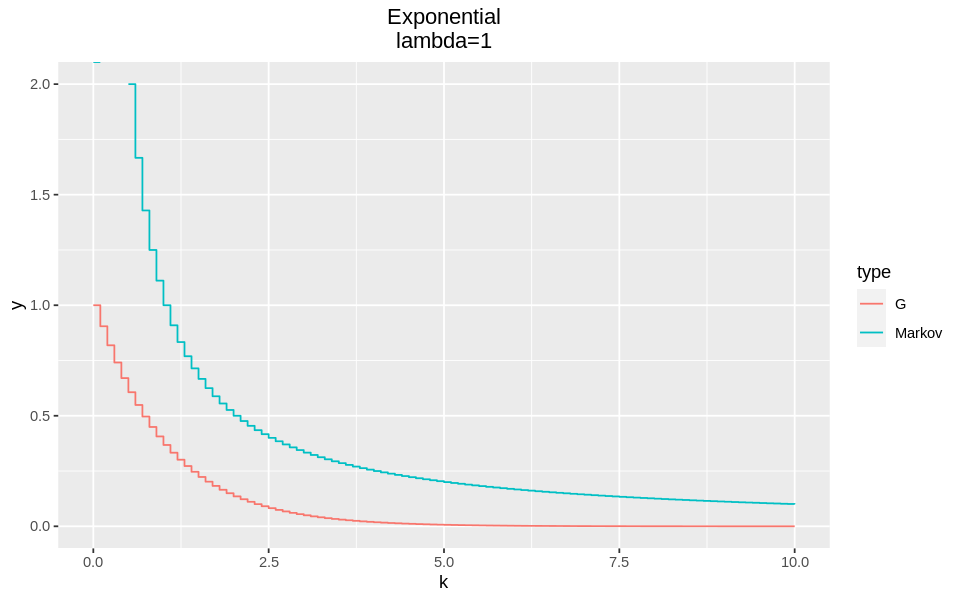

In [41]:
lambda <- 1
df <- data.frame(k, y=c(G(k, pexp, lambda), 1/(lambda*k)), type=c(rep_len("G", length(k)), rep_len("Markov", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     ylim(0, 2) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=paste('Exponential\nlambda=', lambda, sep=''), y='y')
p

### b) Uniform $\mathcal{U}(3, 5)$

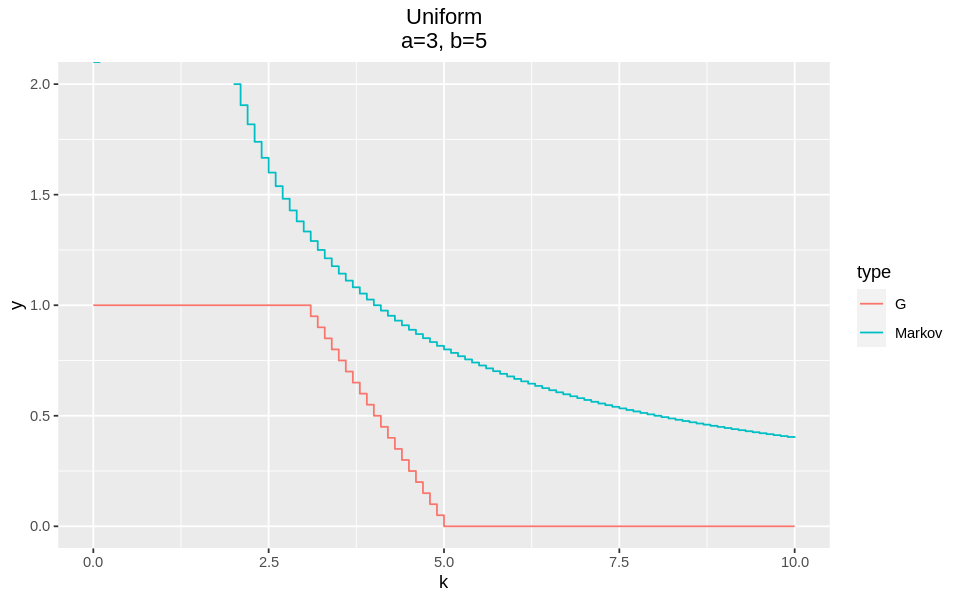

In [42]:
a  <- 3
b  <- 5
df <- data.frame(k, y=c(G(k, punif, a, b), (a+b)/(2*k)), type=c(rep_len("G", length(k)), rep_len("Markov", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     ylim(0, 2) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=paste('Uniform\na=', a, ', b=', b, sep=''), y='y')
p

### c) Binomial $Bin(n=1, p=\frac{1}{2})$

Warning message:
“Removed 194 row(s) containing missing values (geom_path).”


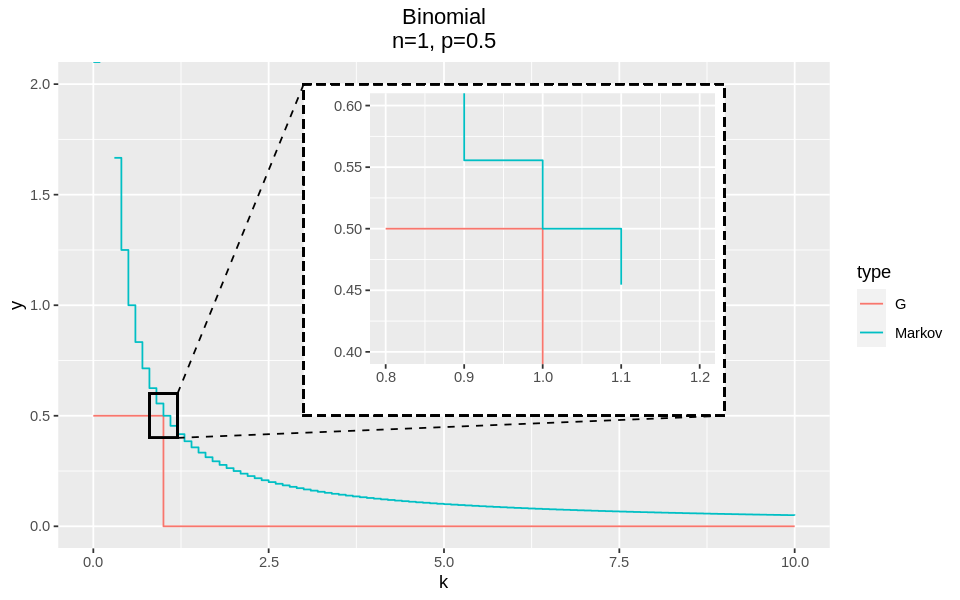

In [43]:
n  <- 1
p  <- 0.5
df <- data.frame(k, y=c(G(k, pbinom, n, p), n*p/k), type=c(rep_len("G", length(k)), rep_len("Markov", length(k))))

p1 <- ggplot(df) +
      geom_step(aes(x=k, y=y, color=type)) +
      ylim(0, 2) +
      theme(plot.title=element_text(hjust=0.5), legend.position='right') +
      labs(title=paste('Binomial\nn=', n, ', p=', p, sep=''), y='y') +
      geom_rect(aes(xmin = 0.8, xmax = 1.2, ymin = 0.4, ymax = 0.6), color = "black", alpha = 0)

p2 <- ggplot(df, aes(x=k, y=y, color=type)) +
      geom_step() +
      coord_cartesian(ylim=c(0.4, 0.6)) +
      xlim(0.8, 1.2) + 
      theme(legend.position = 'none')+
      labs(y='', x='')


p1 + 
  annotation_custom(ggplotGrob(p2), xmin = 3, xmax = 9, ymin = 0.5, ymax = 2) +
  geom_rect(aes(xmin = 3, xmax = 9, ymin = 0.5, ymax = 2), color='black', linetype='dashed', alpha=0) +
  geom_path(aes(x,y,group=grp), data=data.frame(x = c(1.2,3,1.2,9), y=c(0.6, 2, 0.4, 0.5),grp=c(1,1,2,2)),
            linetype='dashed')


### d) Poisson $Pois(\lambda=\frac{1}{2})$

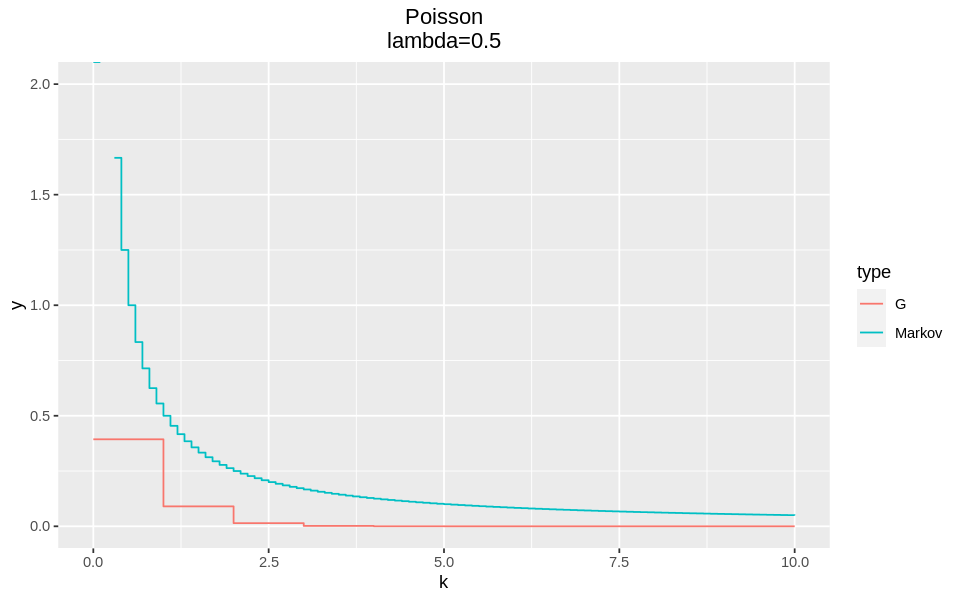

In [44]:
lambda <- 0.5
df <- data.frame(k, y=c(G(k, ppois, lambda), lambda/k), type=c(rep_len("G", length(k)), rep_len("Markov", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     ylim(0, 2) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=paste('Poisson\nlambda=', lambda, sep=''), y='y')
p

## Ex3 - Chebyshev’s inequality

In [45]:
G <- function(k, m, s, cumfunc, ...) {
    return(cumfunc(m-k*s, ...) + cumfunc(k*s+m, ..., lower.tail=F))
}

k <- seq(0.1, 10, length.out=50)

### a) Normal $\mathcal{N}(\mu=3, \sigma=5)$

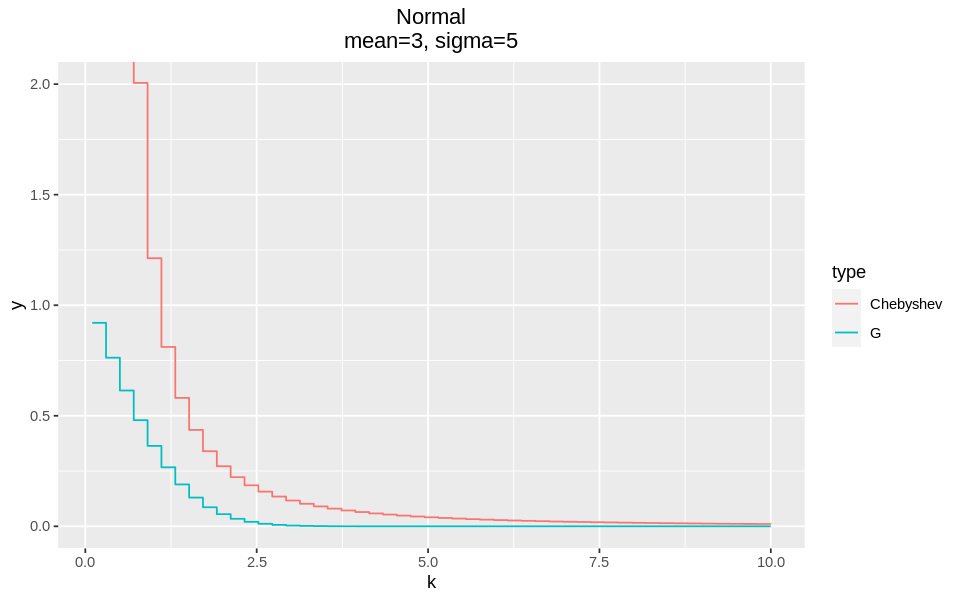

In [46]:
mu <- 3
s  <- 5

df <- data.frame(k, y=c(G(k, mu, s, pnorm, mu, s), 1/k^2), type=c(rep_len("G", length(k)), rep_len("Chebyshev", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     coord_cartesian(ylim=c(0, 2)) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=paste('Normal\nmean=', mu, ', sigma=', s, sep=''), y='y')
p

### b) Exponential $Exp(\lambda=1)$

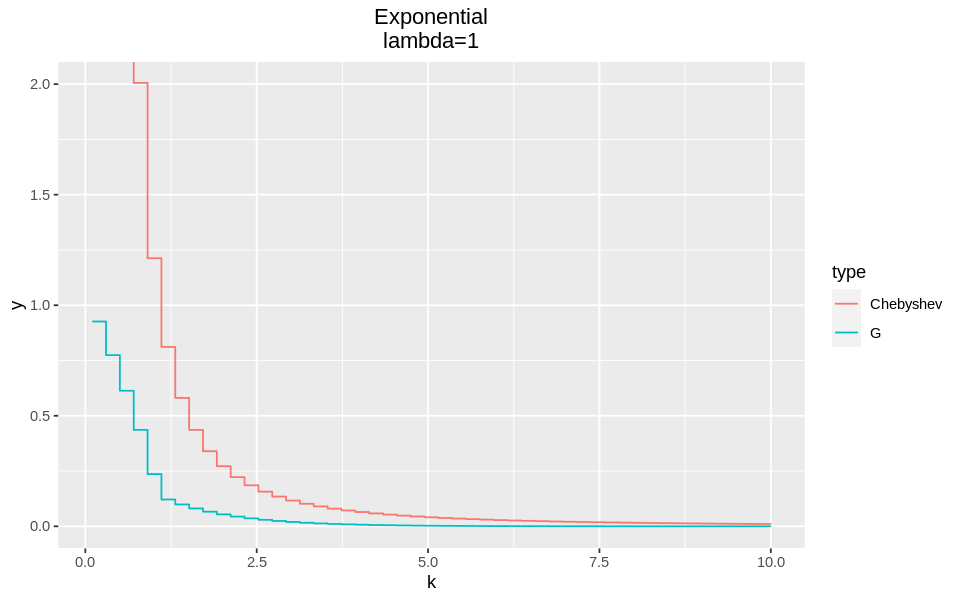

In [47]:
lambda <- 1
df <- data.frame(k, y=c(G(k, 1/lambda, 1/lambda, pexp, lambda), 1/k^2), type=c(rep_len("G", length(k)), rep_len("Chebyshev", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     coord_cartesian(ylim=c(0, 2)) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=paste('Exponential\nlambda=', lambda, sep=''), y='y')
p

### c) Uniform $\mathcal{U}(1-\sqrt{2}, 1+\sqrt{2})$

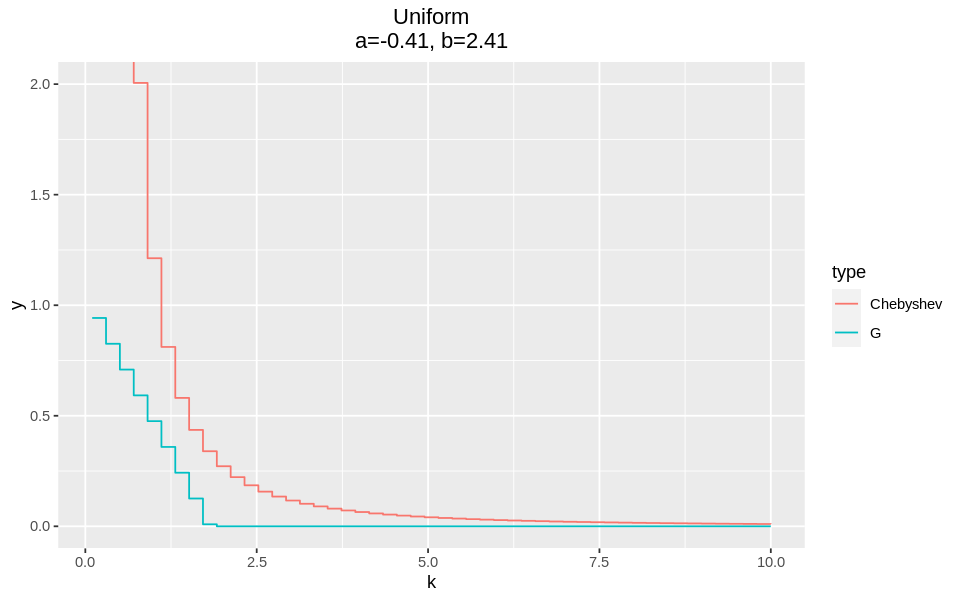

In [48]:
a <- 1-sqrt(2)
b <- 1+sqrt(2)

df <- data.frame(k, y=c(G(k, (a+b)/2, (b-a)/sqrt(12), punif, a, b), 1/k^2), 
                 type=c(rep_len("G", length(k)), rep_len("Chebyshev", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     coord_cartesian(ylim=c(0, 2)) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=sprintf('Uniform\na=%.2f, b=%.2f', a, b), y='y')
p

### d) Poisson $Pois(\lambda=\frac{1}{3})$

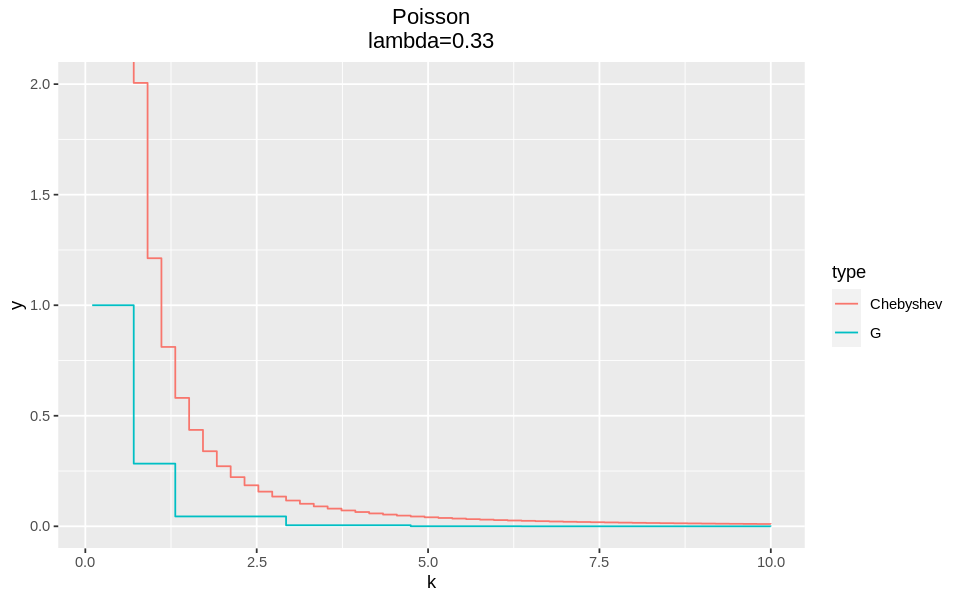

In [49]:
lambda <- 1/3
df <- data.frame(k, y=c(G(k, lambda, sqrt(lambda), ppois, lambda), 1/k^2), type=c(rep_len("G", length(k)), rep_len("Chebyshev", length(k))))

p <- ggplot(df, aes(x=k, y=y, color=type)) +
     geom_step() +
     coord_cartesian(ylim=c(0, 2)) +
     theme(plot.title=element_text(hjust=0.5), legend.position='right') +
     labs(title=sprintf('Poisson\nlambda=%.2f', lambda), y='y')
p

## Ex4 - Six boxes toy model: inference

In [3]:
likelihood <- function(i, n, color) {
    if(color=='b')
        return((n-i)/n)
    else
        return(i/n)
}

posterior <- function(boxes, i, color) {
    j <- i-1
    n_balls <- length(boxes)-3

    return(boxes[[i]] * likelihood(j, n_balls, color)/
           sum(boxes[1:(n_balls+1)] * likelihood(0:n_balls, n_balls, color)))
}

b1		b2		b3		b4		b5		b6 


png 
  2

,b1,b2,b3,b4,b5,b6,c,trial
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.1666667,0.1666666667,0.1666667,0.1666667,0.16666667,0.1666667,NA,0
2,0.3333333,0.2666666667,0.2000000,0.1333333,0.06666667,0.0000000,b,1
3,0.0000000,0.2000000000,0.3000000,0.3000000,0.20000000,0.0000000,w,2
4,0.0000000,0.3200000000,0.3600000,0.2400000,0.08000000,0.0000000,b,3
5,0.0000000,0.4383561644,0.3698630,0.1643836,0.02739726,0.0000000,b,4
6,0.0000000,0.2461538462,0.4153846,0.2769231,0.06153846,0.0000000,w,5
7,0.0000000,0.3459459459,0.4378378,0.1945946,0.02162162,0.0000000,b,6
8,0.0000000,0.1828571429,0.4628571,0.3085714,0.04571429,0.0000000,w,7
9,0.0000000,0.0824742268,0.4175258,0.4175258,0.08247423,0.0000000,w,8


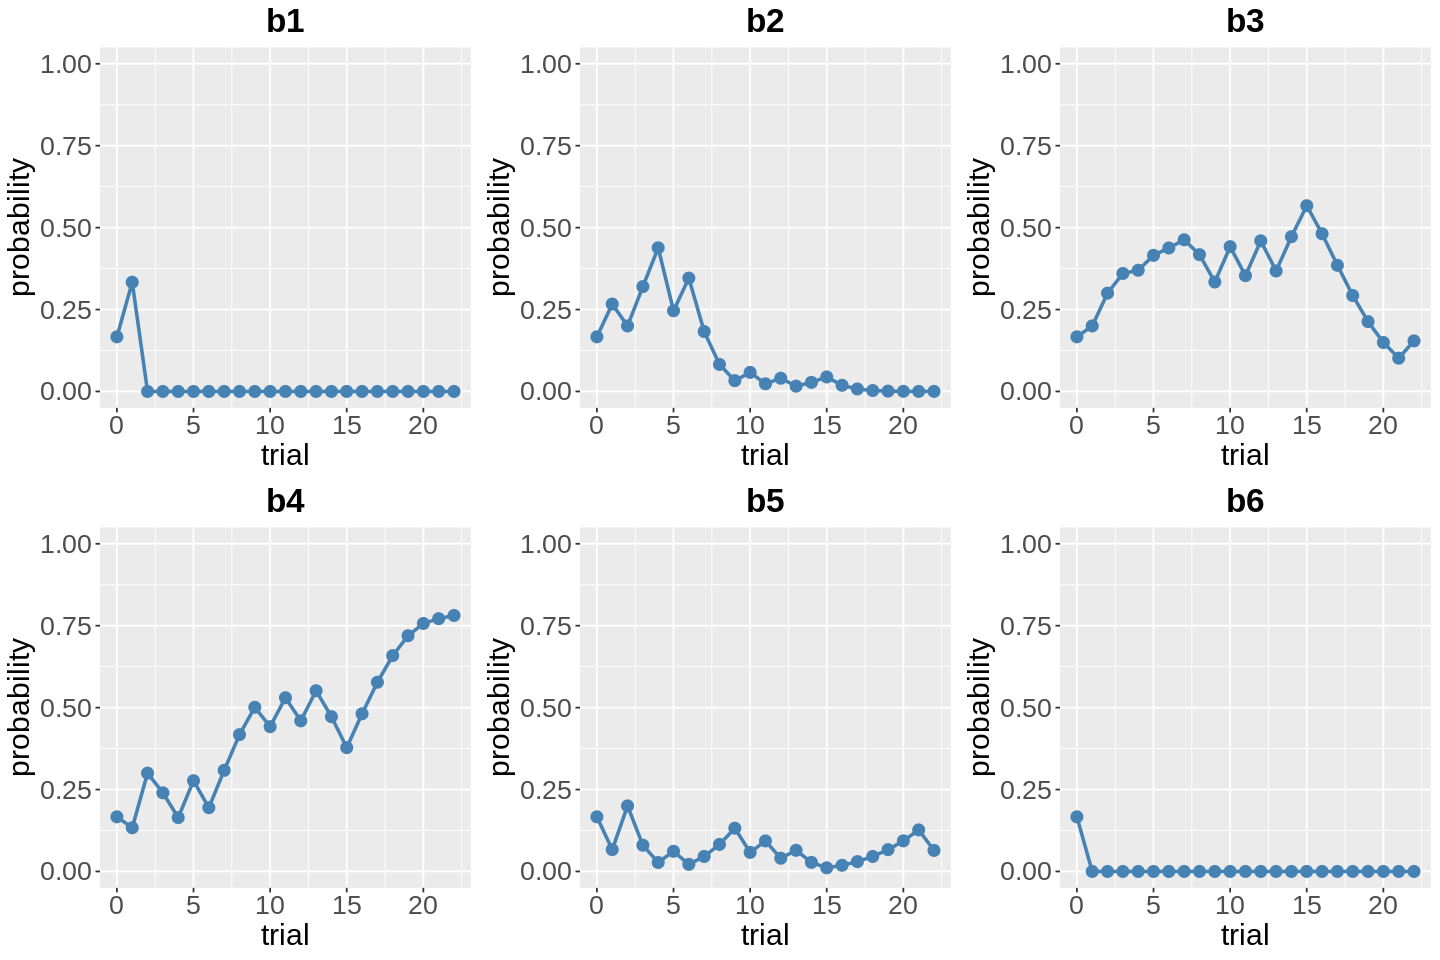

In [33]:
# print output while running cell
evaluate::inject_funs(
  flush.console = function() { base::flush.console(); evaluate::flush_console() },
  flush = function(con) { base::flush(con); evaluate::flush_console() }
)

options(repr.plot.width=12, repr.plot.height=8)

# can change the number of boxes
n_boxes <- 6

# initialize probabilities
boxes <- data.frame()
for (i in 1:n_boxes)
    boxes[1, sprintf('b%i', i)] <- 1/n_boxes
boxes[1, 'c']   <- NA
boxes[1, 'trial'] <- 0
n <- 0

cat(paste(colnames(boxes)[1:(length(boxes)-2)], collapse='\t\t'), '\n')
# device to display plots
x11(height=10, width=16)

# game
repeat{

    # plot data
    plts <- list()
    for (i in 1:n_boxes) {
        box <- colnames(boxes)[[i]]
        plts[[i]] <- ggplot(boxes, aes_string(x='trial', y=box)) +
                     geom_point(color='steelblue', size=3) +
                     geom_path(color='steelblue', size=1) +
                     ylim(0, 1) +
                     theme(plot.title=element_text(size=20, face='bold', hjust=0.5), 
                           axis.text=element_text(size=16),
                           axis.title=element_text(size=18)) +
                     labs(title=box, y='probability')
        
    }
    suppressMessages(grid::grid.draw(arrangeGrob(grobs=lapply(plts, ggplotGrob), ncol=3)))
    
    # ask user input
    color <- readline(prompt='Enter extracted color (b/w/q): ')

    if(color=='q') break
    else if(color !='b' && color !='w') {
        cat("\nPlease, insert 'b', 'w' or 'q' to quit\r")
    }
    else {
        n <- n+1
        # take previous iteration probabilities
        pre_boxes <- tail(boxes, n=1)
        # new iteration
        boxes[n+1, 'c'] <- color
        boxes[n+1, 'trial'] <- n
        for(i in 1:(length(boxes)-2)) {
            boxes[n+1, i] <- posterior(pre_boxes, i, color)
        }
        args <- c(list(paste(rep("%.2e", n_boxes), collapse='\t')), as.list(tail(boxes, n=1)[1:n_boxes]))
        cat(do.call(sprintf, args), '\r')
    
    }

    # print output while running cell
    flush_console()
}
dev.off()
boxes



In [9]:
# turn off devices opened by accident if any (insert the number of device, written in the window header)
dev.off(3)

png 
  2

## Ex5 - Six Boxes Toy Model: simulation

selected box:  5 
trial	 b1		b2		b3		b4		b5		b6 
1 	 0.00e+00	6.67e-02	1.33e-01	2.00e-01	2.67e-01	3.33e-01 
2 	 0.00e+00	1.82e-02	7.27e-02	1.64e-01	2.91e-01	4.55e-01 
3 	 0.00e+00	4.44e-03	3.56e-02	1.20e-01	2.84e-01	5.56e-01 
4 	 0.00e+00	1.02e-03	1.63e-02	8.27e-02	2.61e-01	6.38e-01 
5 	 0.00e+00	2.26e-04	7.23e-03	5.49e-02	2.31e-01	7.06e-01 
6 	 0.00e+00	4.87e-05	3.12e-03	3.55e-02	2.00e-01	7.62e-01 
7 	 0.00e+00	1.03e-05	1.32e-03	2.26e-02	1.69e-01	8.07e-01 
8 	 0.00e+00	2.16e-06	5.53e-04	1.42e-02	1.42e-01	8.44e-01 
9 	 0.00e+00	4.47e-07	2.29e-04	8.80e-03	1.17e-01	8.74e-01 
10 	 0.00e+00	1.32e-05	5.07e-03	1.30e-01	8.65e-01	0.00e+00 
11 	 0.00e+00	4.63e-05	1.33e-02	2.28e-01	7.59e-01	0.00e+00 
12 	 0.00e+00	1.24e-05	7.12e-03	1.83e-01	8.10e-01	0.00e+00 
13 	 0.00e+00	3.25e-06	3.75e-03	1.44e-01	8.52e-01	0.00e+00 
14 	 0.00e+00	8.45e-07	1.95e-03	1.12e-01	8.86e-01	0.00e+00 
15 	 0.00e+00	3.03e-06	5.23e-03	2.01e-01	7.94e-01	0.00e+00 
16 	 0.00e+00	7.99e-07	2.76e-03	1.59e-01	8.38e-01	0.00e+00 


,b1,b2,b3,b4,b5,b6,c,trial
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,0.1666667,1.666667e-01,1.666667e-01,0.16666667,0.1666667,0.1666667,NA,0
2,0.0000000,6.666667e-02,1.333333e-01,0.20000000,0.2666667,0.3333333,w,1
3,0.0000000,1.818182e-02,7.272727e-02,0.16363636,0.2909091,0.4545455,w,2
4,0.0000000,4.444444e-03,3.555556e-02,0.12000000,0.2844444,0.5555556,w,3
5,0.0000000,1.021450e-03,1.634321e-02,0.08273749,0.2614913,0.6384065,w,4
6,0.0000000,2.259887e-04,7.231638e-03,0.05491525,0.2314124,0.7062147,w,5
7,0.0000000,4.874482e-05,3.119669e-03,0.03553497,0.1996588,0.7616378,w,6
8,0.0000000,1.032791e-05,1.321973e-03,0.02258714,0.1692125,0.8068681,w,7
9,0.0000000,2.159925e-06,5.529408e-04,0.01417127,0.1415529,0.8437208,w,8


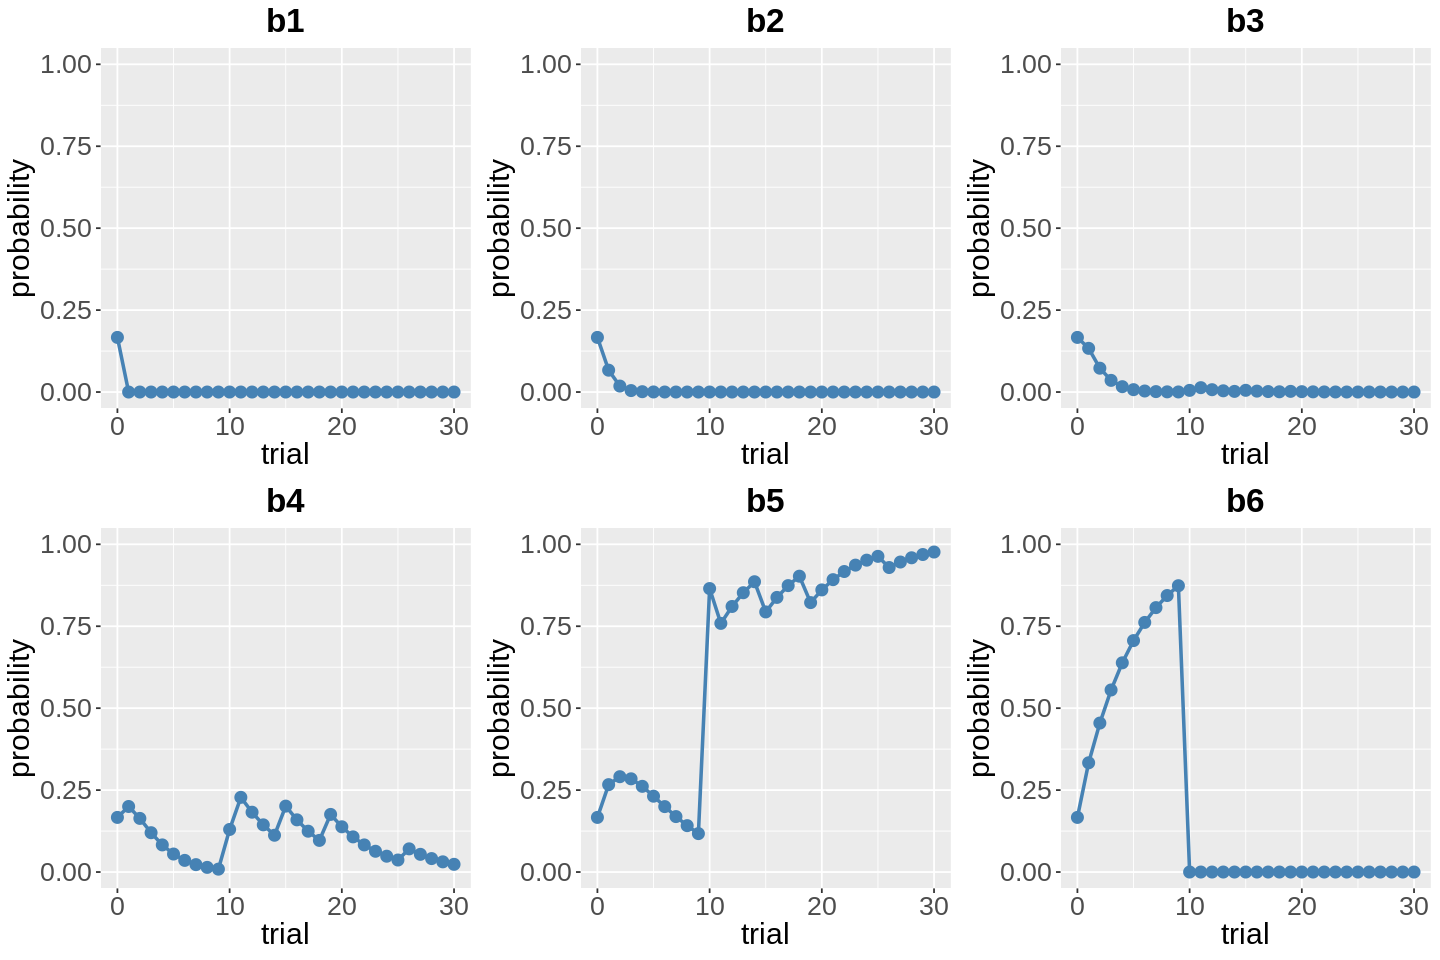

In [35]:
options(repr.plot.width=12, repr.plot.height=8)

# can change the number of boxes
n_boxes  <- 6
# number of trials
n_trials <- 30

# initialize probabilities
boxes <- data.frame()
for (i in 1:n_boxes)
    boxes[1, sprintf('b%i', i)] <- 1/n_boxes
boxes[1, 'c']   <- NA
boxes[1, 'trial'] <- 0

# choose box randomly
box <- sample(1:n_boxes, 1)
cat("selected box: ", box, '\n')
cat('trial\t', paste(colnames(boxes)[1:(length(boxes)-2)], collapse='\t\t'), '\n')

# game
for (i in 1:n_trials) {

    # extract color
    color <- ifelse(runif(1, 1, n_boxes) < box, 'w', 'b' )

    if(color=='q') break
    else if(color !='b' && color !='w') {
        cat("\nPlease, insert 'b', 'w' or 'q' to quit\r")
    }
    else {
        # take previous iteration probabilities
        pre_boxes <- tail(boxes, n=1)
        # new iteration
        boxes[i+1, 'c'] <- color
        boxes[i+1, 'trial'] <- i
        for(j in 1:(length(boxes)-2)) {
            boxes[i+1, j] <- posterior(pre_boxes, j, color)
        }
        args <- c(list(paste(rep("%.2e", n_boxes), collapse='\t')), as.list(tail(boxes, n=1)[1:n_boxes]))
        cat(i, '\t', do.call(sprintf, args), '\n')
    
    }
}

# plot data
plts <- list()
for (i in 1:n_boxes) {
    box <- colnames(boxes)[[i]]
    plts[[i]] <- ggplot(boxes, aes_string(x='trial', y=box)) +
                 geom_point(color='steelblue', size=3) +
                 geom_path(color='steelblue', size=1) +
                 ylim(0, 1) +
                 theme(plot.title=element_text(size=20, face='bold', hjust=0.5), 
                       axis.text=element_text(size=16),
                       axis.title=element_text(size=18)) +
                 labs(title=box, y='probability')
    
}
suppressMessages(grid::grid.draw(arrangeGrob(grobs=lapply(plts, ggplotGrob), ncol=3)))
    
boxes